# Ejercicio 1. Aproximando con una serie.

## Planteamiento del problema.

De la expresión mediante una serie para la función $\sin (x)$, sabemos que:
$$
\begin{align}
\begin{aligned}[b]
\sin(x) &= \sum_{n = 1}^{\infty} \: \dfrac{(-1)^{n-1} \: x^{2n - 1}}{(2n - 1)!} \hspace{0.5cm} \text{(exacta)} \\[5pt]
& \simeq \sum_{n = 1}^{N} \: \dfrac{(-1)^{n-1} \: x^{2n - 1}}{(2n - 1)!} \hspace{0.5cm} \text{(aproximacion)} \\[5pt]
& = \sin(x) + \varepsilon(x, N)
\end{aligned}
\tag{1}
\end{align}
$$

Veamos el resultado y su error al hacer una aproximación finita de la expresión:
$$
\begin{align*}
\sin(x) \simeq \sum_{n = 1}^{N} \: \dfrac{(-1)^{n-1} \: x^{2n-1}}{(2 \, n - 1)!}
\end{align*}
$$

No perdamos de vista que la anterior expresión nos indica que debemos de calcular $(-1)^{n-1} \: x^{2n-1}$, para luego dividirlo entre $(2 \, n - 1)!$. No es una buena idea para implementarla en el código.

Para valores grandes de $n$:
1. Calcular el factorial puede consumir demasiado tiempo.
2. Elevar a la potencia, puede causar un overflow, y como es el denominador, no queremos problemas en esta parte.

Cambiemos la operación de la siguiente manera: usaremos una multiplicación que nos relacione el **siguiente término** con un **término previo** de la serie.

$$
\begin{eqnarray*}
\begin{aligned}
\dfrac{(-1)^{n-1} \, x^{2n-1}}{(2 \, n - 1)!} &= \dfrac{-x^{2}}{(2 \, n - 1)(2 \, n -2)} \, \dfrac{(-1)^{n-2} \, x^{2n-3}}{(2 \, n - 3)!} \\[1em]
\Rightarrow \hspace{0.2cm} n \, \text{término} &= \dfrac{-x^{2}}{(2 \, n - 1)(2 \, n -2)} \, (n - 1) \, \text{término}
\end{aligned}
\end{eqnarray*}
$$

## Primera propuesta de código.

Implementemos una primera propuesta de código, que luego de revisarla tendrá una mejora.

Debemos de introducir un valor $x$ de tal manera que se evalúe con la suma finita, toma en cuenta que la función *math.sin(x)*, el argumento $x$ debe de estar en radianes.

Podemos hacer la conversión conocida de la geometría, o utilizar la función *math.radians(x)* para obtener el valor en radianes.

## ¿Qué es lo que hará el código?

Luego vamos a calcular el error relativo (con una función de usuario), ocupando como valor **exacto** el que nos devuelve la función *math.sin(x)* de python.

Usemos el valor de $x = 30$ grados para el ejercicio.

In [ ]:
import math

# Aqui va la funcion para el error relativo
# def error_relativo(arg1, arg2):
#     codigo necesario


a = float(input('Teclea el valor a evaluar: '))
x = math.radians(a)

j = 0
n = 10
suma = x
term =  x

print('x \t aproximacion \t  error')
for i in range(2, n):
    j += 1
    term = (-term * x * x)/((2 * i - 1) * (2 * i - 2))
    suma  = suma + term
    #print('{0:} \t {1:1.10f} \t {2:1.5e}'.format(j, suma, error_relativo(arg1, arg2)))
    print (j, suma, sep='\t')

## Incluye una rutina de graficación.

Para visualizar el comportamiento del error relativo, hay que incluir una rutina de graficación: el valor del error relativo contra la iteración, de esta manera tendremos oportunidad de identificar visualmente qué ocurre con el error relativo.
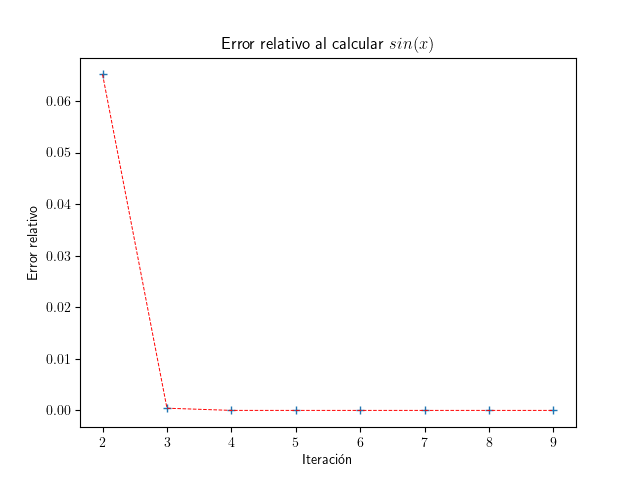

En una primera revisión podemos considerar que el error relativo se anula en la segunda iteración, pero cuantitativamente vemos que el error no es cero, para mejorar la gráfica, se recomienda cambiar la escala del eje $y$, haciendo un ajuste logarítmico, así nuestra gráfica pasa a tener una escala semi-logarítmica.

La instrucción en matplotlib que nos permite este cambio es: <code>plt.semilogy(eje_x, eje_y)</code>
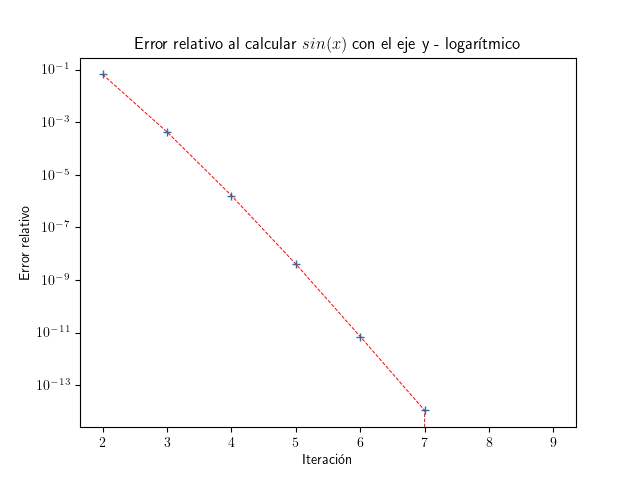

Con el ajuste anterior, vemos la manera en la que se comporta el error relativo, para que en un momento, se anula.

## Pregunta a responder.

¿Será que debemos de indicar un **número grande** de pasos para hacer que el error relativo sea muy cercano a cero?

En el siguiente ejercicio responderemos esta pregunta.